In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('diabetics.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#missing values analysis and treatment
df.isnull().sum()   

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
cols_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_zero] = df[cols_zero].replace(0, df[cols_zero].median())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Ranges

--> glucose       (80-100)

--> bloodpressure (50-120)

--> skinThickness (10-60)

--> Insulin       (15-850)

--> BMI           (18-50)

--> DPF           (0-2.5)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


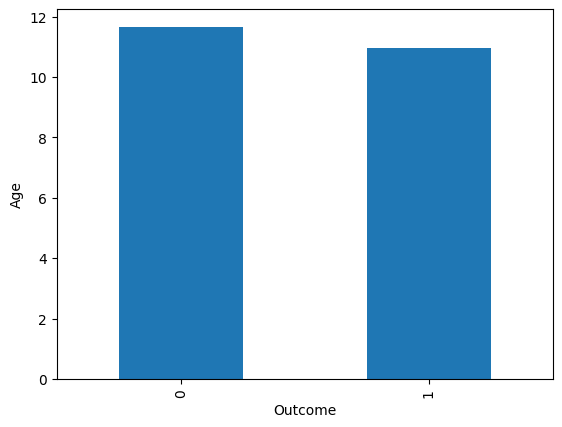

In [10]:
df['Age'].groupby(df['Outcome']).std().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

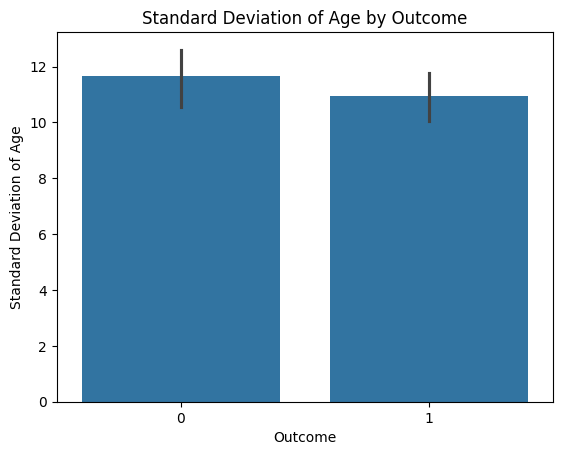

In [11]:
sns.barplot(
    x='Outcome',
    y='Age',
    data=df,
    estimator=np.std
)
plt.ylabel('Standard Deviation of Age')
plt.title('Standard Deviation of Age by Outcome')
plt.show()



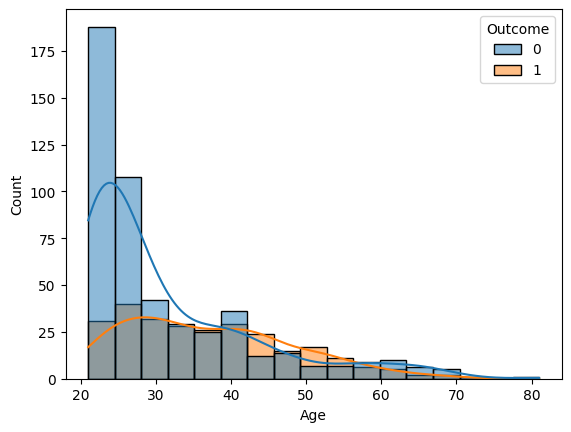

In [12]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

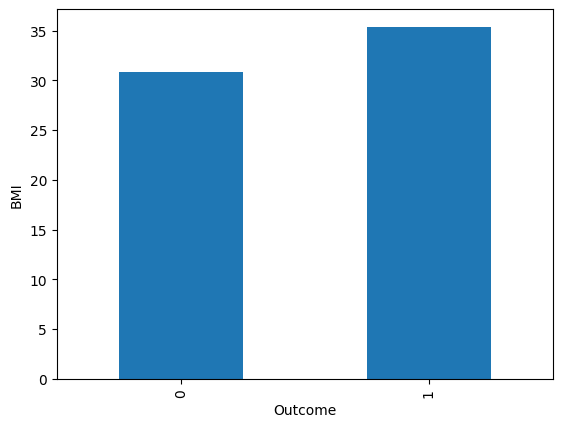

In [14]:
df['BMI'].groupby(df['Outcome']).mean().plot(kind='bar')
plt.xlabel('Outcome')  
plt.ylabel('BMI')
plt.show()

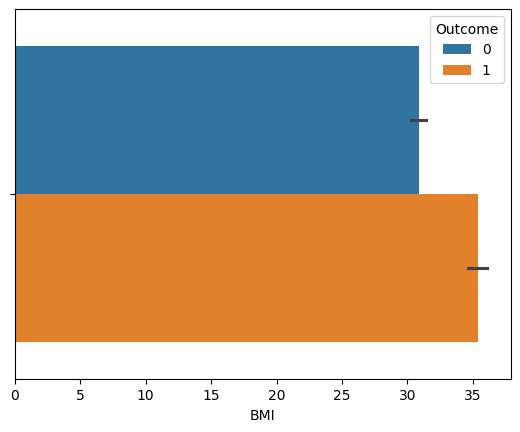

In [15]:
sns.barplot(x='BMI',hue='Outcome',data=df,estimator='mean')
plt.show()

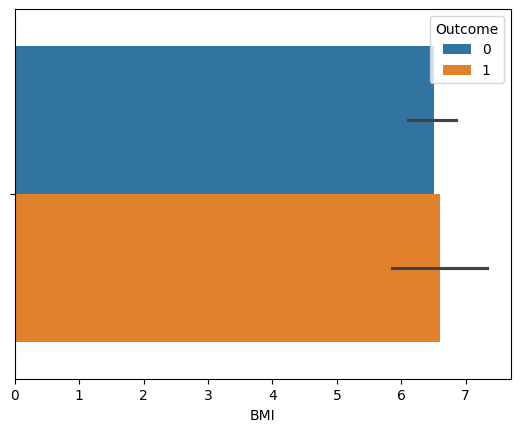

In [16]:
sns.barplot(x='BMI',hue='Outcome',data=df,estimator='std')
plt.show()

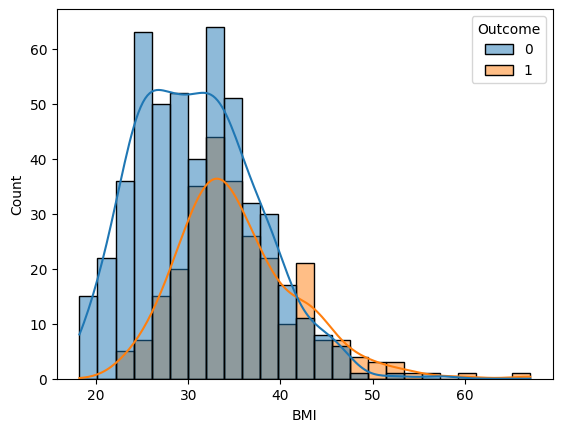

In [17]:
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True)
plt.show()

In [18]:
die_age=df[df['Outcome']==1]['Age']
nondie_age=df[df['Outcome']==0]['Age']

In [19]:
# H0 : Both data are same
# H1 : Both data are different
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_age, nondie_age)

alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


In [20]:
die_bmi=df[df['Outcome']==1]['BMI']
nondie_bmi=df[df['Outcome']==0]['BMI']
# H0 : Both data are same
# H1 : Both data are different
from scipy.stats import ttest_ind
stat,p=ttest_ind(die_bmi, nondie_bmi)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


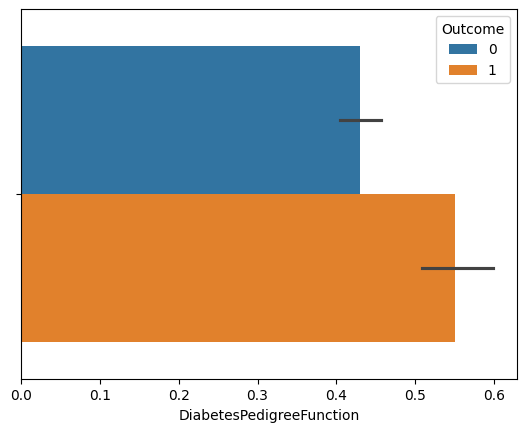

In [21]:
sns.barplot(x='DiabetesPedigreeFunction',hue='Outcome',data=df,estimator='mean')
plt.show()

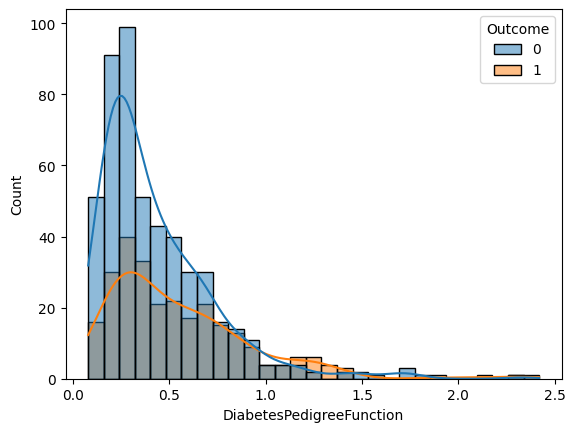

In [22]:
sns.histplot(data=df,x='DiabetesPedigreeFunction',hue='Outcome',kde=True)
plt.show()

In [23]:
die_Dpf=df[df['Outcome']==1]['DiabetesPedigreeFunction']
nondie_Dpf=df[df['Outcome']==0]['DiabetesPedigreeFunction']
# H0 : Both data are same
# H1 : Both data are different
stat,p=ttest_ind(die_Dpf, nondie_Dpf)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0') 

Reject H0


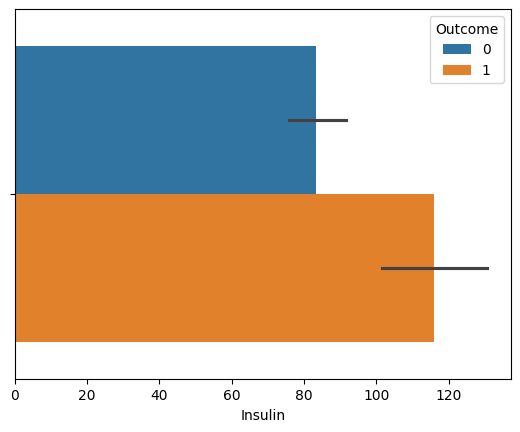

In [24]:
sns.barplot(x='Insulin',hue='Outcome',data=df,estimator='mean')
plt.show()

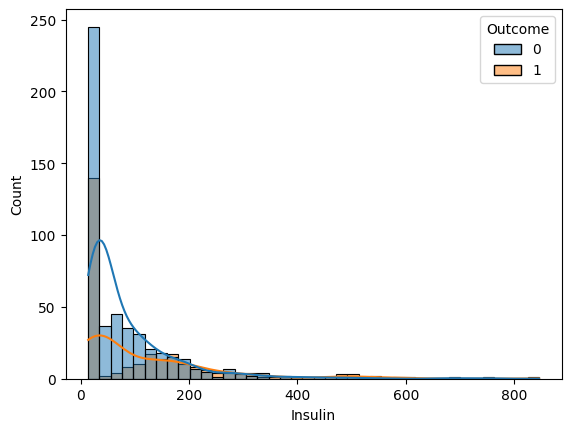

In [25]:
sns.histplot(x='Insulin',hue='Outcome',data=df,kde=True)
plt.show()

In [26]:
die_insulin=df[df['Outcome']==1]['Insulin']
nondie_insulin=df[df['Outcome']==0]['Insulin']
# H0 : Both data are same
# H1 : Both data are different
stat,p=ttest_ind(die_insulin, nondie_insulin)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


--> As we observed in t-test,the insulin column is accepting H0 which is significantly not differ.so,Insulin column will not effect on outcome

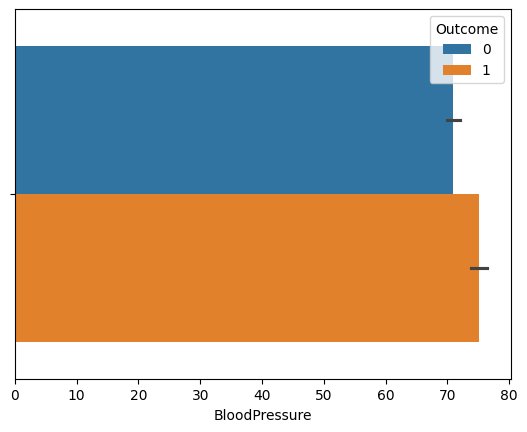

In [27]:
sns.barplot(x='BloodPressure',hue='Outcome',data=df,estimator='mean')
plt.show()

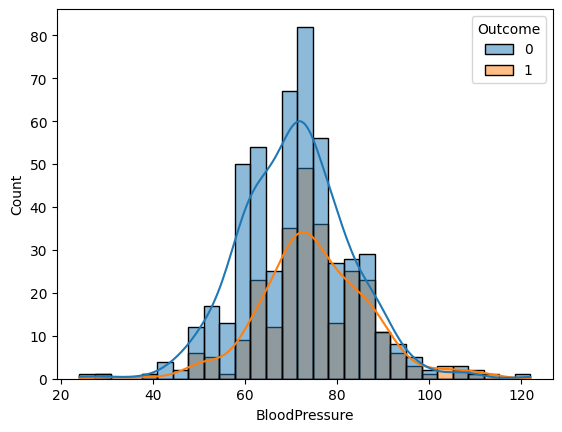

In [28]:
sns.histplot(x='BloodPressure',hue='Outcome',data=df,kde=True)
plt.show()

In [29]:
die_bp=df[df['Outcome']==1]['BloodPressure']
nondie_bp=df[df['Outcome']==0]['BloodPressure']
# H0 : Both data are same
# H1 : Both data are different
stat,p=ttest_ind(die_bp, nondie_bp)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


# Insights
--> Rejecting H0 in BloodPressure will leads to dis-similarity (significantly differ) which effect on outcome.

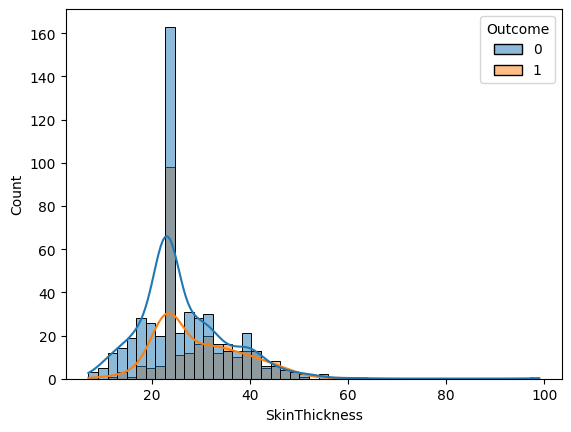

In [30]:
sns.histplot(x='SkinThickness',hue='Outcome',data=df,kde=True)
plt.show()

In [31]:
die_skinthickness=df[df['Outcome']==1]['SkinThickness']
nondie_skinthickness=df[df['Outcome']==0]['SkinThickness']
# H0 : Both data are same
# H1 : Both data are different
stat,p=ttest_ind(die_skinthickness, nondie_skinthickness)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

Reject H0


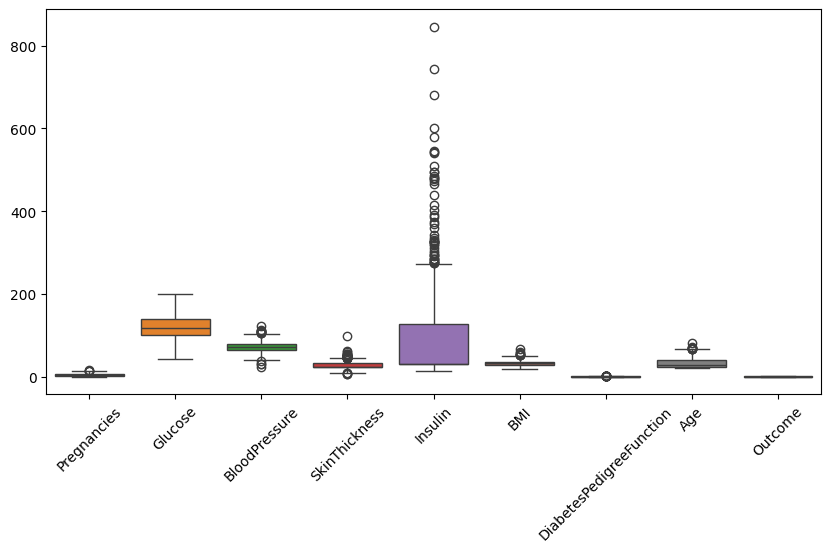

In [32]:
# outlier analysis and treatment
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                9.0000
Insulin                     96.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


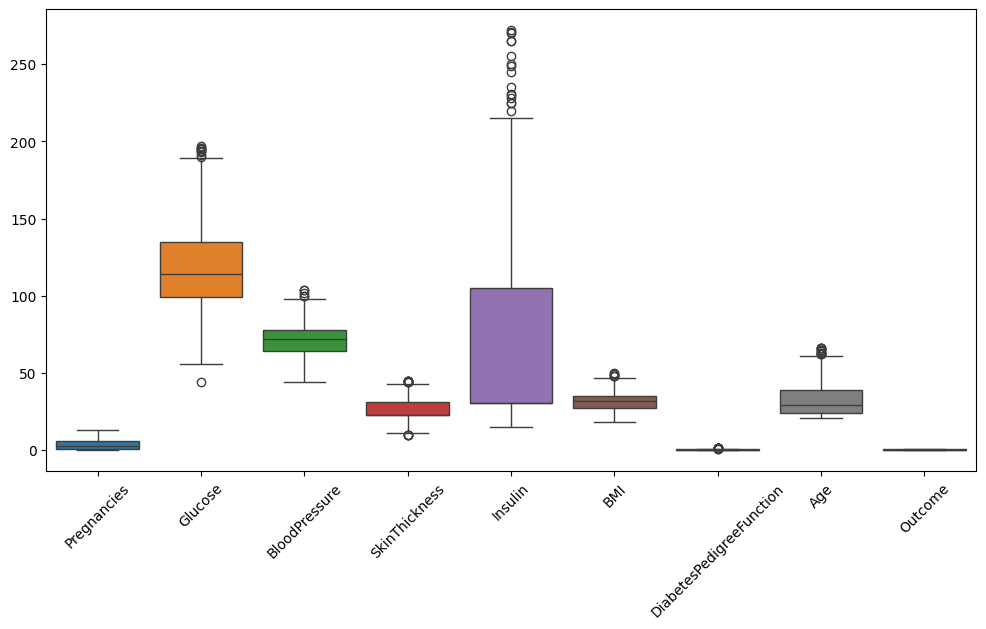

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [35]:
#min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#except on outcome
X=df.drop('Outcome',axis=1)
y=df['Outcome']
scaled=scaler.fit_transform(X)
df_scaled=pd.DataFrame(scaled,columns=X.columns)
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.679739,0.466667,0.714286,0.060311,0.484277,0.493261,0.644444
1,0.076923,0.267974,0.366667,0.542857,0.060311,0.264151,0.245283,0.222222
2,0.615385,0.908497,0.333333,0.371429,0.060311,0.160377,0.533693,0.244444
3,0.076923,0.294118,0.366667,0.371429,0.307393,0.311321,0.079964,0.000000
4,0.384615,0.470588,0.500000,0.371429,0.060311,0.232704,0.110512,0.200000


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test, y_pred)

0.7696335078534031

In [38]:
confusion_matrix(y_test,y_pred)

array([[121,   6],
       [ 38,  26]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       127
           1       0.81      0.41      0.54        64

    accuracy                           0.77       191
   macro avg       0.79      0.68      0.69       191
weighted avg       0.78      0.77      0.74       191



In [40]:
y_pred_proba=model.predict_proba(X_test)
y_pred_proba

array([[0.78958392, 0.21041608],
       [0.9042819 , 0.0957181 ],
       [0.73515287, 0.26484713],
       [0.76249719, 0.23750281],
       [0.92081742, 0.07918258],
       [0.539936  , 0.460064  ],
       [0.65129505, 0.34870495],
       [0.71924656, 0.28075344],
       [0.66428971, 0.33571029],
       [0.69512966, 0.30487034],
       [0.65430063, 0.34569937],
       [0.82107268, 0.17892732],
       [0.72310012, 0.27689988],
       [0.9186265 , 0.0813735 ],
       [0.61374691, 0.38625309],
       [0.73288464, 0.26711536],
       [0.92794451, 0.07205549],
       [0.29855884, 0.70144116],
       [0.46122475, 0.53877525],
       [0.84944122, 0.15055878],
       [0.31592405, 0.68407595],
       [0.58785934, 0.41214066],
       [0.88155709, 0.11844291],
       [0.33429819, 0.66570181],
       [0.78840123, 0.21159877],
       [0.90991056, 0.09008944],
       [0.90655544, 0.09344456],
       [0.16644246, 0.83355754],
       [0.82412937, 0.17587063],
       [0.19828647, 0.80171353],
       [0.

In [42]:
from sklearn.metrics import precision_score, recall_score,f1_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.8125
Recall: 0.40625
F1 Score: 0.5416666666666666


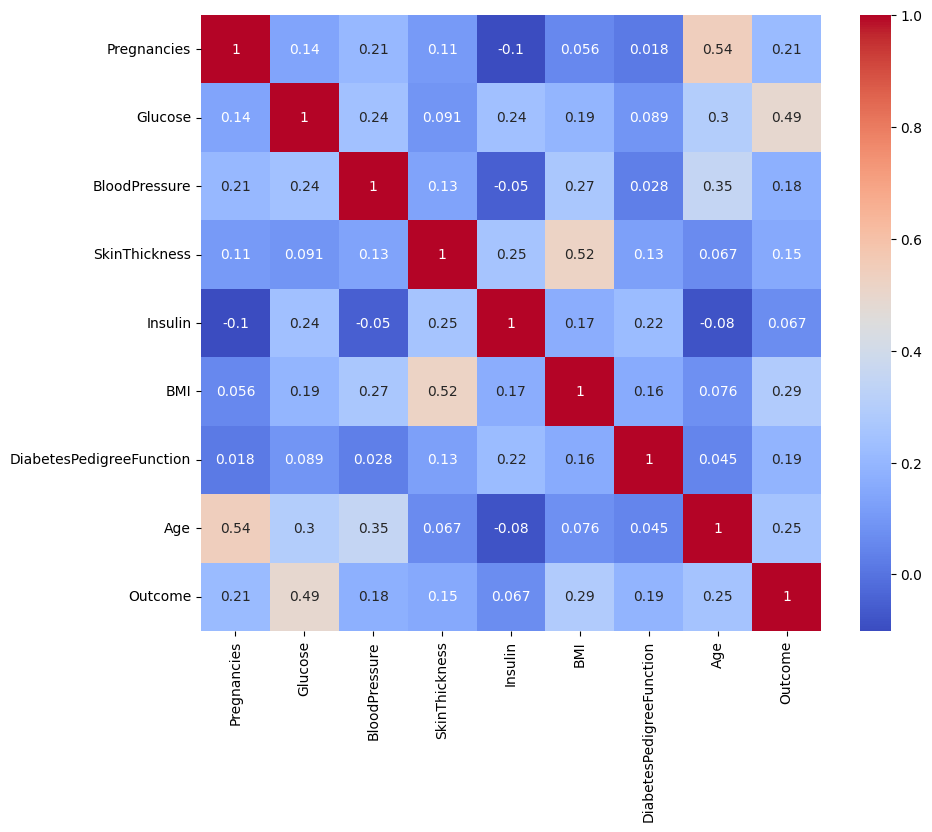

In [41]:
# correlation analysis
corr = df.corr()
corr

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [43]:
from sklearn.metrics import roc_curve,roc_auc_score
X_test.shape

(191, 8)

In [44]:
model.predict_proba(X_test)[:,1]

array([0.21041608, 0.0957181 , 0.26484713, 0.23750281, 0.07918258,
       0.460064  , 0.34870495, 0.28075344, 0.33571029, 0.30487034,
       0.34569937, 0.17892732, 0.27689988, 0.0813735 , 0.38625309,
       0.26711536, 0.07205549, 0.70144116, 0.53877525, 0.15055878,
       0.68407595, 0.41214066, 0.11844291, 0.66570181, 0.21159877,
       0.09008944, 0.09344456, 0.83355754, 0.17587063, 0.80171353,
       0.08008125, 0.42892862, 0.35357477, 0.38029724, 0.15806901,
       0.38079828, 0.41091153, 0.2074179 , 0.54446244, 0.30219308,
       0.55775888, 0.12237276, 0.56450495, 0.22712657, 0.31298479,
       0.62332087, 0.56395746, 0.30727415, 0.47629326, 0.72755217,
       0.15781373, 0.25889313, 0.33967191, 0.30274388, 0.69333716,
       0.3446185 , 0.55888527, 0.22215843, 0.31953787, 0.28958828,
       0.13662883, 0.35642376, 0.11025204, 0.54204511, 0.10525676,
       0.15302827, 0.3536271 , 0.07882139, 0.08678689, 0.31616794,
       0.22492216, 0.4298554 , 0.14202601, 0.06499115, 0.19475

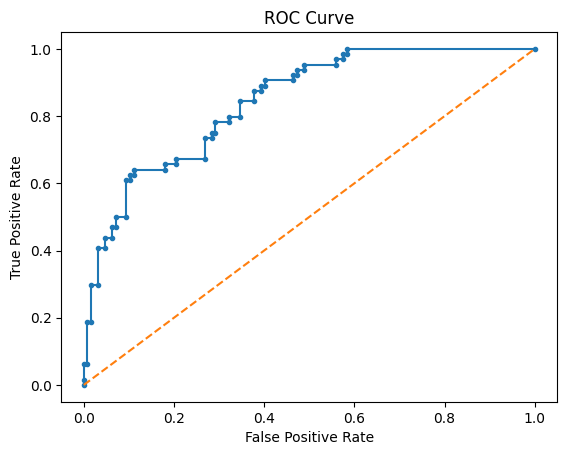

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1],[0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()